### Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("ASM03.20241013T201006.csv") # Reading the dataset
df.head() # Displaying first 5 lines of dataset

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010 January,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,2010 January,Great Britain,Departures,Thousand,407.6
2,Air and Sea Travel,2010 January,Other UK (1),Arrivals,Thousand,0.9
3,Air and Sea Travel,2010 January,Other UK (1),Departures,Thousand,1.1
4,Air and Sea Travel,2010 January,Belgium,Arrivals,Thousand,12.5


In [4]:
df.tail() # Display last 5 lines of dataset

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
6331,Air and Sea Travel,2024 August,United Arab Emirates,Departures,Thousand,36.3
6332,Air and Sea Travel,2024 August,Other Countries(42),Arrivals,Thousand,58.2
6333,Air and Sea Travel,2024 August,Other Countries(42),Departures,Thousand,51.7
6334,Air and Sea Travel,2024 August,All countries,Arrivals,Thousand,2400.4
6335,Air and Sea Travel,2024 August,All countries,Departures,Thousand,2308.0


In [5]:
df.info() # Getting more information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6336 non-null   object 
 1   Month            6336 non-null   object 
 2   Country          6336 non-null   object 
 3   Direction        6336 non-null   object 
 4   UNIT             6336 non-null   object 
 5   VALUE            6332 non-null   float64
dtypes: float64(1), object(5)
memory usage: 297.1+ KB


In [6]:
df.describe() # Using this command to see further information of the nominal data

,VALUE
count,6332.000000
mean,139.659934
std,322.690716
min,0.000000
25%,13.375000
50%,37.200000
75%,87.125000
max,2400.400000


In [7]:
df.shape # Getting the exact number of rows and features in the dataset

(6336, 6)

In [8]:
import seaborn as sns
# Loading library to use below plot.

C:\Users\Public\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


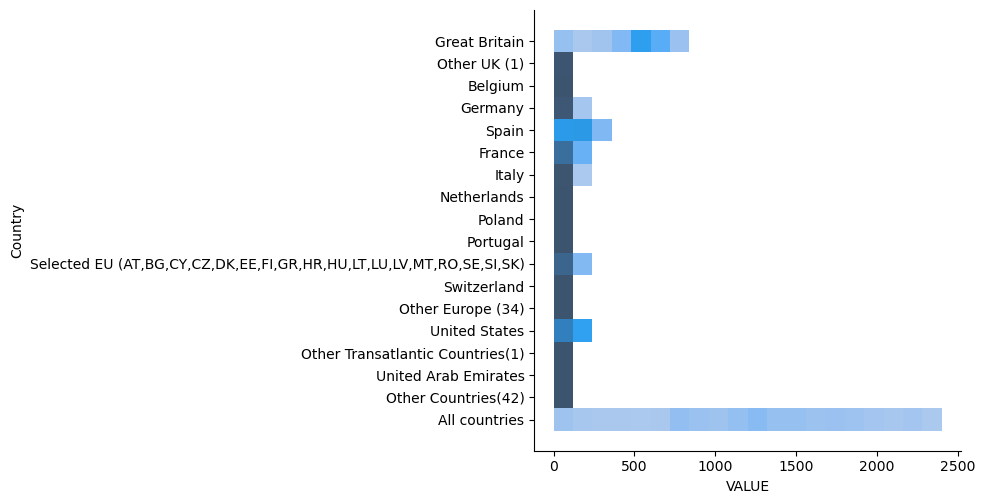

In [9]:
sns.displot(data=df, x='VALUE', y='Country', bins=20) # Plotting the 'Country' column against the 'VALUE' column (no. of travellers) 

In [10]:
df.isnull() # Getting an overview of Null values

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6331,False,False,False,False,False,False
6332,False,False,False,False,False,False
6333,False,False,False,False,False,False
6334,False,False,False,False,False,False


In [11]:
df.isnull().sum() #Checking the sum of null values by column

STATISTIC Label    0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              4
dtype: int64

In [12]:
df.isnull().sum().sum() # Checking the total number of null values in the dataset (Mukhiya & Ahmed, 2020, p.114)

4

In [13]:
df.dropna(axis=0)
df.dropna(axis=1)

,STATISTIC Label,Month,Country,Direction,UNIT
0,Air and Sea Travel,2010 January,Great Britain,Arrivals,Thousand
1,Air and Sea Travel,2010 January,Great Britain,Departures,Thousand
2,Air and Sea Travel,2010 January,Other UK (1),Arrivals,Thousand
3,Air and Sea Travel,2010 January,Other UK (1),Departures,Thousand
4,Air and Sea Travel,2010 January,Belgium,Arrivals,Thousand
...,...,...,...,...,...
6331,Air and Sea Travel,2024 August,United Arab Emirates,Departures,Thousand
6332,Air and Sea Travel,2024 August,Other Countries(42),Arrivals,Thousand
6333,Air and Sea Travel,2024 August,Other Countries(42),Departures,Thousand
6334,Air and Sea Travel,2024 August,All countries,Arrivals,Thousand


### Encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder # Importing necessary library for Encoding 
from sklearn.preprocessing import LabelEncoder 

In [16]:
l_encoder=LabelEncoder()
one_encoder=OneHotEncoder(sparse_output=False)

In [17]:
encode_df = pd.read_csv("ASM03.20241013T201006.csv")

In [18]:
#df.dropna(axis=0) # Droping missing values so they do not affect machine learning algorithms
#df.isnull().values.any()

In [19]:
#encode_df = df.dropna(axis = 0, how = 'all') # Dropping rows with missing values

In [20]:
#encode_df = df.dropna(axis = 1, how = 'all') # Dropping columns with missing values

In [21]:
#encode_df.isnull().values.any() # Checking to see if all rows and columns with missing values are dropped

In [22]:
encode_df.fillna(0, inplace = True) # (Ranjan, 2024)

In [23]:
encode_df.isnull().values.any() # Checking to see if all rows and columns with missing values are dropped

False

In [24]:
encode_df.isnull().sum()

STATISTIC Label    0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              0
dtype: int64

In [25]:
encode_df["Month"]=l_encoder.fit_transform(df["Month"])
#encode_df["Direction"]=o_encoder.fit_transform(encode_df["Direction"])

In [26]:
encode_df.head(25)

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,4,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,4,Great Britain,Departures,Thousand,407.6
2,Air and Sea Travel,4,Other UK (1),Arrivals,Thousand,0.9
3,Air and Sea Travel,4,Other UK (1),Departures,Thousand,1.1
4,Air and Sea Travel,4,Belgium,Arrivals,Thousand,12.5
5,Air and Sea Travel,4,Belgium,Departures,Thousand,12.5
6,Air and Sea Travel,4,Germany,Arrivals,Thousand,45.3
7,Air and Sea Travel,4,Germany,Departures,Thousand,42.7
8,Air and Sea Travel,4,Spain,Arrivals,Thousand,68.6
9,Air and Sea Travel,4,Spain,Departures,Thousand,64.2


In [27]:
encode_df.tail(12)

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
6324,Air and Sea Travel,169,Other Europe (34),Arrivals,Thousand,27.6
6325,Air and Sea Travel,169,Other Europe (34),Departures,Thousand,24.5
6326,Air and Sea Travel,169,United States,Arrivals,Thousand,227.8
6327,Air and Sea Travel,169,United States,Departures,Thousand,233.8
6328,Air and Sea Travel,169,Other Transatlantic Countries(1),Arrivals,Thousand,43.9
6329,Air and Sea Travel,169,Other Transatlantic Countries(1),Departures,Thousand,44.6
6330,Air and Sea Travel,169,United Arab Emirates,Arrivals,Thousand,37.9
6331,Air and Sea Travel,169,United Arab Emirates,Departures,Thousand,36.3
6332,Air and Sea Travel,169,Other Countries(42),Arrivals,Thousand,58.2
6333,Air and Sea Travel,169,Other Countries(42),Departures,Thousand,51.7


In [28]:
encode_df["Direction"]=l_encoder.fit_transform(df[["Direction"]])

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
encode_df.head()

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,4,Great Britain,0,Thousand,361.5
1,Air and Sea Travel,4,Great Britain,1,Thousand,407.6
2,Air and Sea Travel,4,Other UK (1),0,Thousand,0.9
3,Air and Sea Travel,4,Other UK (1),1,Thousand,1.1
4,Air and Sea Travel,4,Belgium,0,Thousand,12.5


In [30]:
encode_df["STATISTIC Label"]=one_encoder.fit_transform(df[["STATISTIC Label"]])

In [31]:
encode_df.head()

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,1.0,4,Great Britain,0,Thousand,361.5
1,1.0,4,Great Britain,1,Thousand,407.6
2,1.0,4,Other UK (1),0,Thousand,0.9
3,1.0,4,Other UK (1),1,Thousand,1.1
4,1.0,4,Belgium,0,Thousand,12.5


In [32]:
encode_df.tail()

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
6331,1.0,169,United Arab Emirates,1,Thousand,36.3
6332,1.0,169,Other Countries(42),0,Thousand,58.2
6333,1.0,169,Other Countries(42),1,Thousand,51.7
6334,1.0,169,All countries,0,Thousand,2400.4
6335,1.0,169,All countries,1,Thousand,2308.0


In [33]:
encode_df["Country"]=l_encoder.fit_transform(df[["Country"]])

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
encode_df.head()

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,1.0,4,4,0,Thousand,361.5
1,1.0,4,4,1,Thousand,407.6
2,1.0,4,10,0,Thousand,0.9
3,1.0,4,10,1,Thousand,1.1
4,1.0,4,1,0,Thousand,12.5


In [35]:
encode_df["UNIT"]=l_encoder.fit_transform(df[["UNIT"]])

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
encode_df.head()

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
0,1.0,4,4,0,0,361.5
1,1.0,4,4,1,0,407.6
2,1.0,4,10,0,0,0.9
3,1.0,4,10,1,0,1.1
4,1.0,4,1,0,0,12.5


In [37]:
encode_df.tail()

,STATISTIC Label,Month,Country,Direction,UNIT,VALUE
6331,1.0,169,16,1,0,36.3
6332,1.0,169,7,0,0,58.2
6333,1.0,169,7,1,0,51.7
6334,1.0,169,0,0,0,2400.4
6335,1.0,169,0,1,0,2308.0


### Machine Learning

#### Decision Tree

In [40]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [41]:
feature_columns = ['STATISTIC Label', 'Month', 'Country', 'UNIT', 'VALUE'] # Defining the feature columns
X = encode_df[feature_columns] # 
y= encode_df.Direction # The target variable
X, y

(      STATISTIC Label  Month  Country  UNIT   VALUE
 0                 1.0      4        4     0   361.5
 1                 1.0      4        4     0   407.6
 2                 1.0      4       10     0     0.9
 3                 1.0      4       10     0     1.1
 4                 1.0      4        1     0    12.5
 ...               ...    ...      ...   ...     ...
 6331              1.0    169       16     0    36.3
 6332              1.0    169        7     0    58.2
 6333              1.0    169        7     0    51.7
 6334              1.0    169        0     0  2400.4
 6335              1.0    169        0     0  2308.0
 
 [6336 rows x 5 columns],
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 6331    1
 6332    0
 6333    1
 6334    0
 6335    1
 Name: Direction, Length: 6336, dtype: int32)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Split the test data

In [43]:
X_train
X_test

,STATISTIC Label,Month,Country,UNIT,VALUE
2498,1.0,70,6,0,41.1
2420,1.0,61,14,0,214.8
3396,1.0,93,5,0,40.6
2489,1.0,70,1,0,24.5
1720,1.0,38,9,0,0.1
...,...,...,...,...,...
2246,1.0,67,6,0,32.9
4872,1.0,132,5,0,0.8
2855,1.0,73,2,0,135.9
2990,1.0,74,10,0,2.0


In [44]:
y_train
y_test

2498    0
2420    0
3396    0
2489    1
1720    0
       ..
2246    0
4872    0
2855    1
2990    0
3948    0
Name: Direction, Length: 1901, dtype: int32

In [45]:
# Accuracy of the Decision Tree Model
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48921620199894794


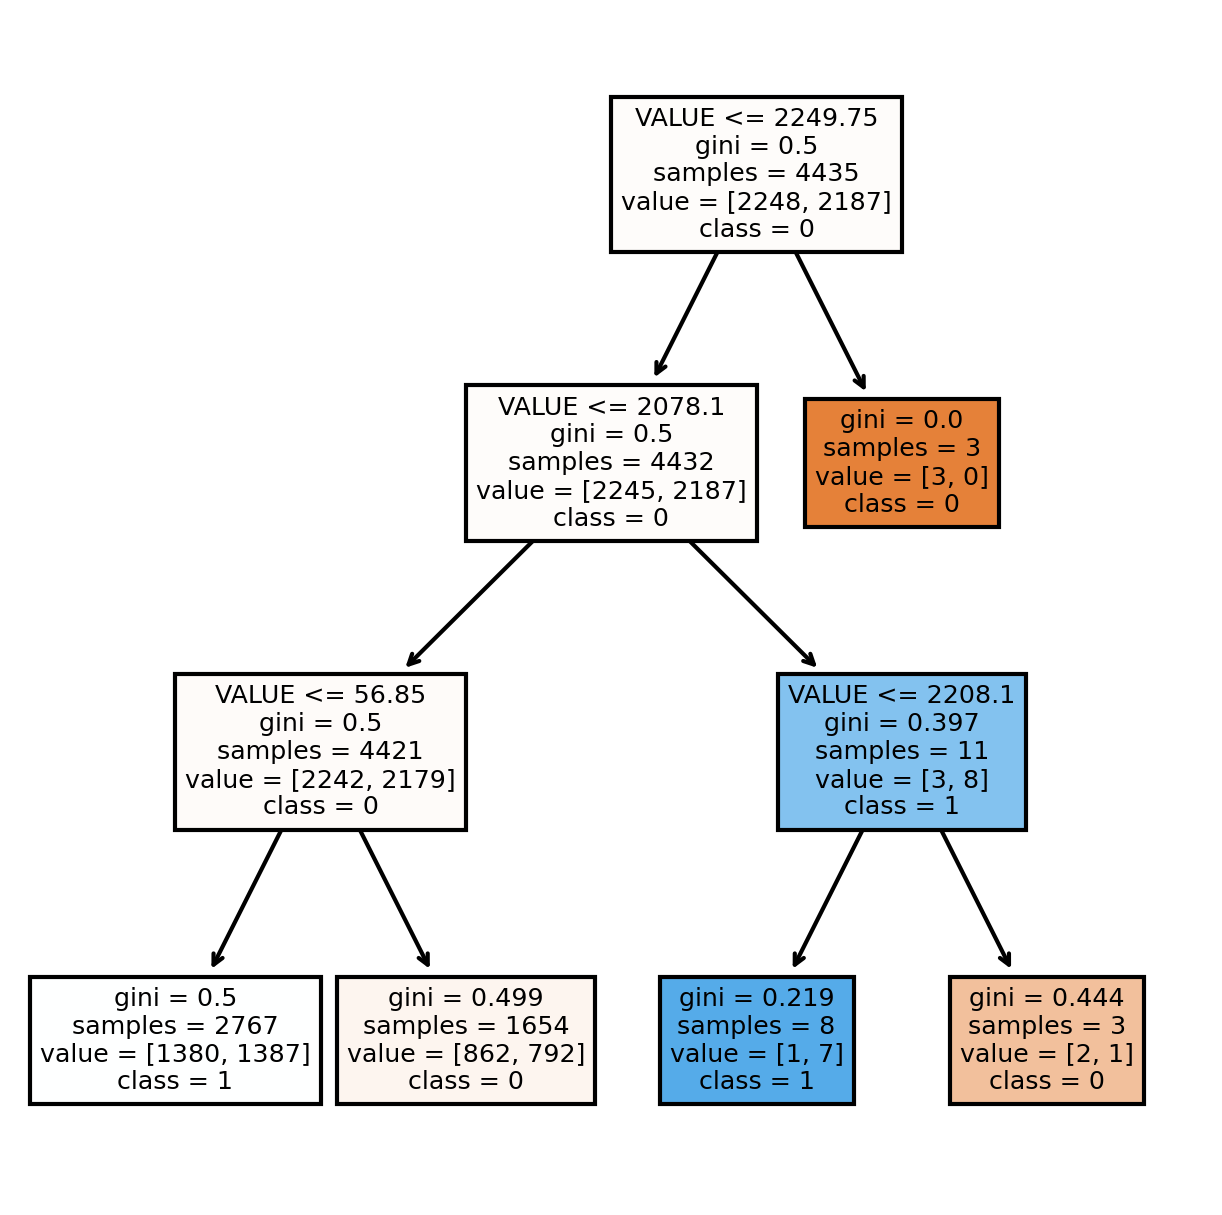

In [46]:
# Evaluation of Decision Tree Algorithm

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


feature_columns = ['STATISTIC Label', 'Month', 'Country', 'UNIT', 'VALUE'] # Defining the feature columns
classes = ['0', '1']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300 )

tree.plot_tree(clf,
               feature_names = feature_columns,
               class_names = classes,
               filled = True);



In [47]:
# Hyper parameter - Gini Index
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48921620199894794


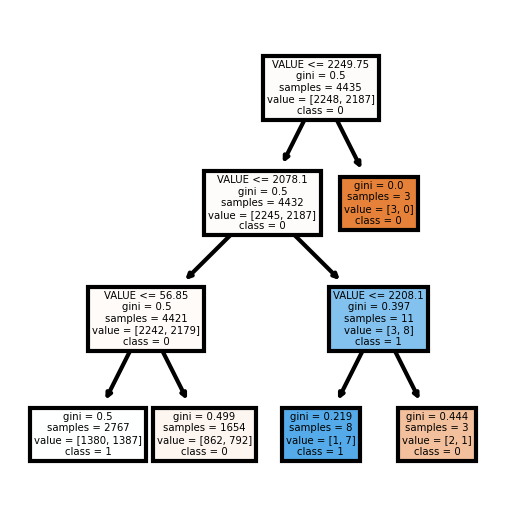

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


feature_columns = ['STATISTIC Label', 'Month', 'Country', 'UNIT', 'VALUE'] # Defining the feature columns
classes = ['0', '1']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300 )

tree.plot_tree(clf,
               feature_names = feature_columns,
               class_names = classes,
               filled = True);

## Support Vector Machine

In [50]:
# Loading libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [51]:
# Loading dataset
#svm_dataset = pd.read_csv("ASM03.20241013T201006.csv")
#svm_dataset.head()


In [52]:
# Splitting my dataset into dependent and independent variables
#X = svm_dataset.iloc[:, [2, 3]].values
#y = svm_dataset.iloc[:, 4].values

# (Zafar, 2023)

X = np.asarray(encode_df.drop('Direction', axis=1)) 
y = np.asarray(encode_df['Direction']) # The target variable

y[y == 0]=-1

X.shape # Show the number of rows and columns

(6336, 5)

In [53]:
y[0:15] # Showing the first 15 Y values

array([-1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1])

In [54]:
from sklearn.model_selection import train_test_split # (Zafar, 2023)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # Split the test data

In [55]:
SC = StandardScaler()
X_train_normalized = SC.fit_transform(X_train)
X_test_normalized = SC.fit_transform(X_test)

In [56]:
classifier = SVC(kernel = 'rbf', random_state = 1)
classifier.fit(X_train, y_train)

# (Zafar, 2023)

SVC(random_state=1)

In [57]:
y_pred = classifier.predict(X_test) # (Zafar, 2023)
print(y_pred)

[-1 -1 -1 ... -1 -1 -1]


[[611   3]
 [653   1]]
              precision    recall  f1-score   support

          -1       0.48      1.00      0.65       614
           1       0.25      0.00      0.00       654

    accuracy                           0.48      1268
   macro avg       0.37      0.50      0.33      1268
weighted avg       0.36      0.48      0.32      1268



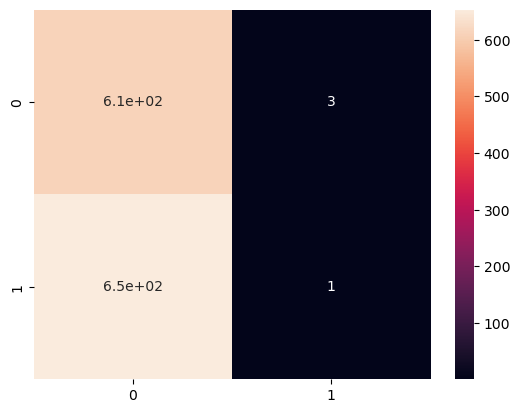

In [58]:
# Building Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred) 

# (Zafar, 2023)

import seaborn as sns

sns.heatmap(cm, annot = True)
print(classification_report(y_test, y_pred))

In [59]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48264984227129337


#### Comparing Decisison Treee & SVM

In [61]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [62]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

In [63]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = SVC(random_state = 0)
eclf =  EnsembleVoteClassifier(clfs=[clf1, clf2], weights=[2,1], voting='soft')

In [64]:
X = np.asarray(encode_df.drop('Direction', axis=1)) 
y = np.asarray(encode_df['Direction']) # The target variable
X: X[:,[0,2]]

In [65]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10, 6))
for clf, lab, grd in zip([clf1, clf2, eclf],
                         'Decision Tree', 'SVM', 'Ensemble',
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=3)
    plt.title(lab)

plt.show()

ValueError: too many values to unpack (expected 3)

<Figure size 1000x600 with 0 Axes>

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6336 non-null   object 
 1   Month            6336 non-null   object 
 2   Country          6336 non-null   object 
 3   Direction        6336 non-null   object 
 4   UNIT             6336 non-null   object 
 5   VALUE            6332 non-null   float64
dtypes: float64(1), object(5)
memory usage: 297.1+ KB


#### Graphs

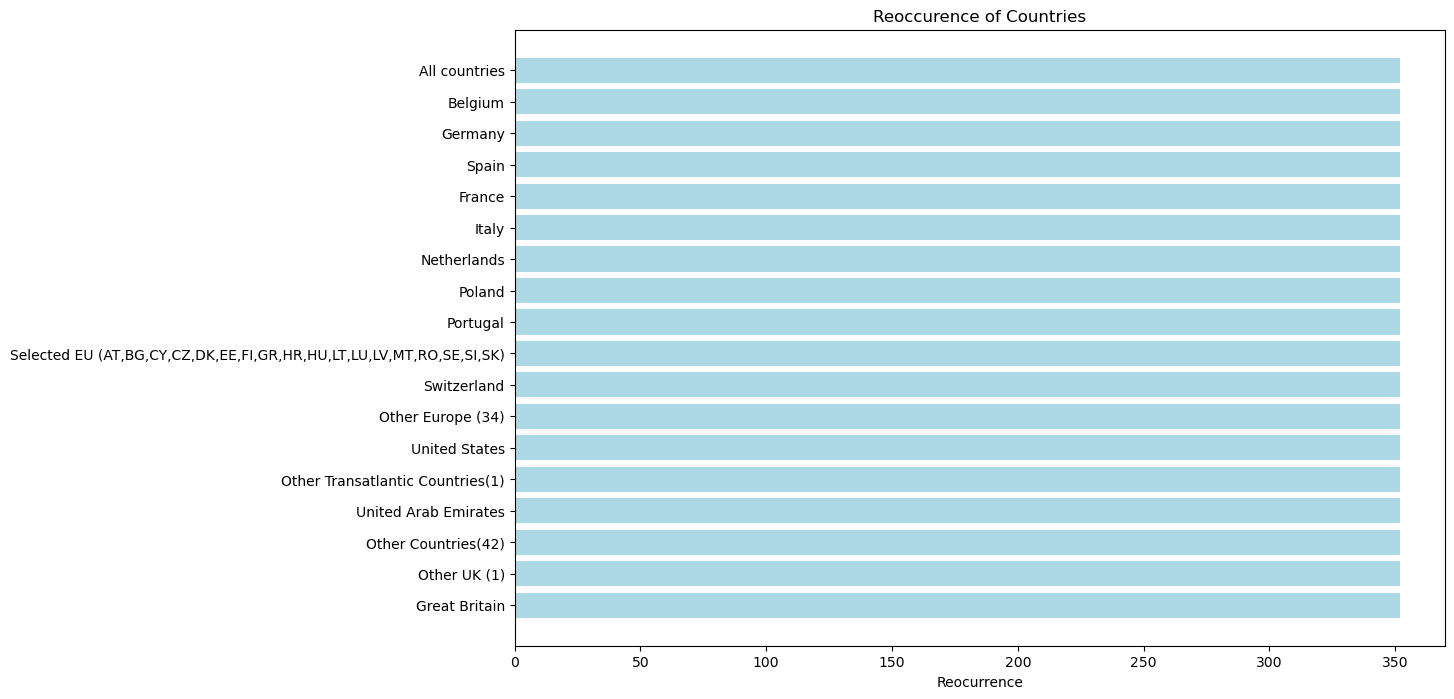

In [68]:
# Bar Chart
count_countries = df['Country'].value_counts()


plt.figure(figsize=(12,8))
plt.barh(count_countries.index, count_countries.values, color='lightblue')
plt.xlabel('Reocurrence')
plt.title('Reoccurence of Countries')
plt.show()

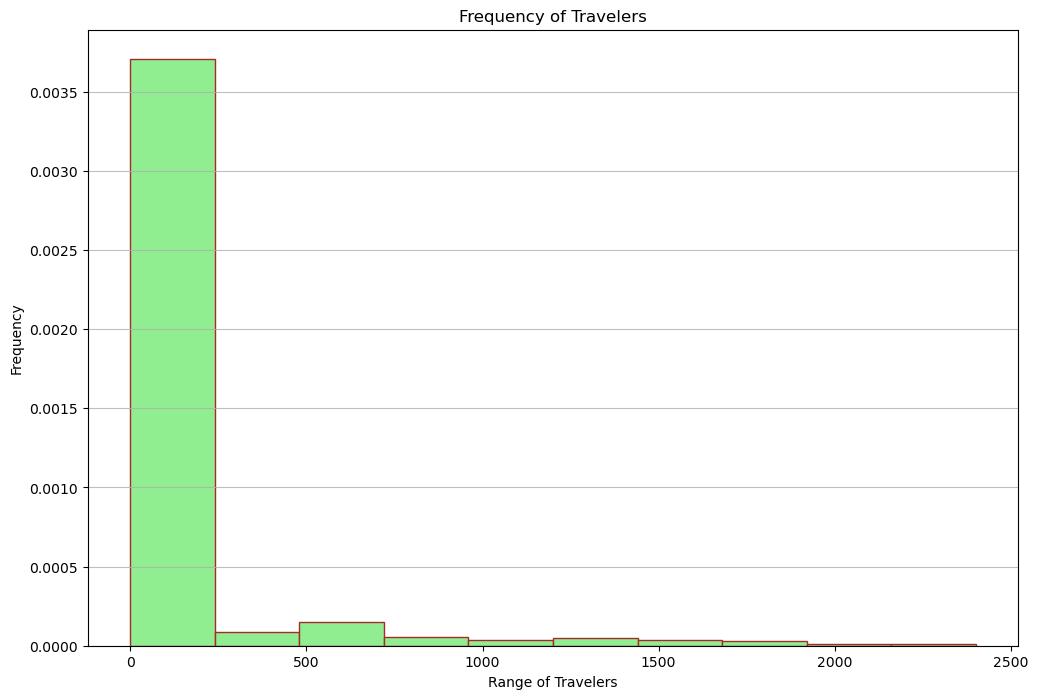

In [69]:
# Histogram
plt.figure(figsize=(12,8))
plt.hist(df['VALUE'], bins=10, density=True, color='lightgreen', edgecolor='brown')
plt.xlabel('Range of Travelers')
plt.ylabel('Frequency')
plt.title('Frequency of Travelers')
plt.grid(axis='y', linestyle='-', alpha=0.8)

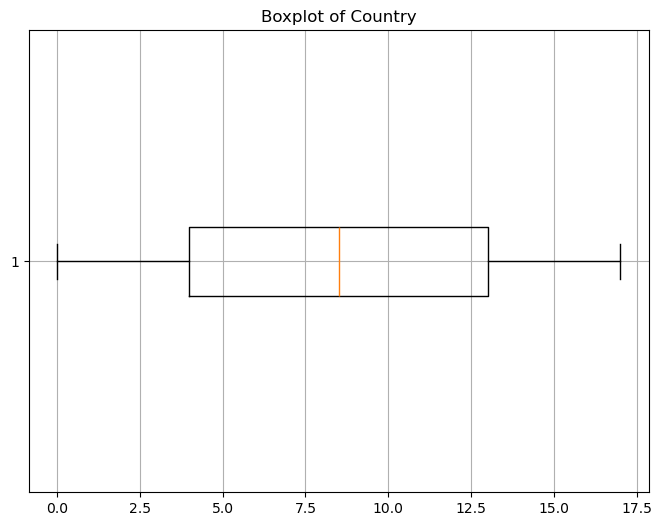

In [70]:
# Box Plot

plt.figure(figsize=(8,6))
plt.boxplot(encode_df['Country'],vert=False)
plt.title('Boxplot of Country')
plt.grid(True)
plt.show()


#### Poisson Distribution

In [72]:
df.describe()

,VALUE
count,6332.000000
mean,139.659934
std,322.690716
min,0.000000
25%,13.375000
50%,37.200000
75%,87.125000
max,2400.400000


In [73]:
from scipy.stats import poisson

# To generate random values from Poisson with mean=139.7 and sample size = 100
poisson.rvs(mu=140, size=100)

# (Bobbit, 2021)

array([153, 147, 120, 151, 140, 118, 149, 156, 130, 132, 148, 128, 127,
       127, 159, 150, 147, 150, 156, 152, 133, 145, 166, 141, 160, 120,
       113, 129, 156, 129, 148, 108, 127, 138, 141, 142, 154, 141, 157,
       149, 139, 152, 130, 140, 125, 150, 123, 123, 142, 151, 157, 137,
       161, 133, 139, 147, 126, 137, 150, 163, 119, 134, 153, 152, 138,
       130, 153, 131, 167, 136, 155, 137, 144, 128, 133, 115, 103, 145,
       139, 145, 146, 145, 118, 139, 159, 138, 135, 132, 126, 148, 144,
       139, 145, 137, 151, 132, 153, 140, 135, 149], dtype=int64)

In [74]:
# On average, there were 140 thousand travellers arriving into or departing Ireland monthly.
# What then is the probability of there being 155 thousand in one month

poisson.pmf(k=155, mu=140)

# (Bobbit, 2021)

0.014735343615724874

In [75]:
# What is the probabillity of 100 thousand travellers in one month?

poisson.pmf(k=100, mu=140)

# (Bobbit, 2021)

6.943404181609957e-05

Text(0.5, 1.0, 'Value Range of Travelers Sample Size')

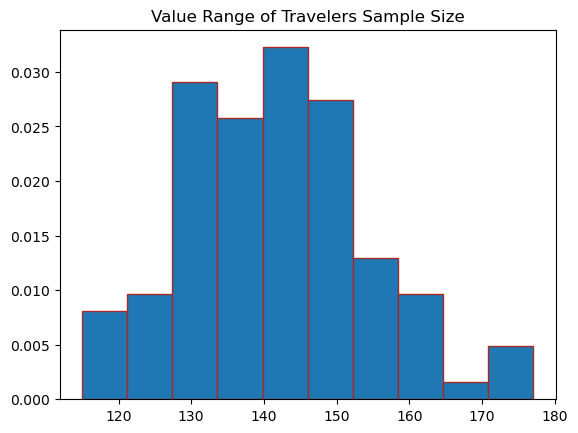

In [76]:
# Displaying poisson distribution on a histogram
x = poisson.rvs(mu=140, size=100) # (Bobbit, 2021)           

plt.hist(x, density=True, edgecolor='brown')
plt.title('Value Range of Travelers Sample Size')

NameError: name 'mu' is not defined

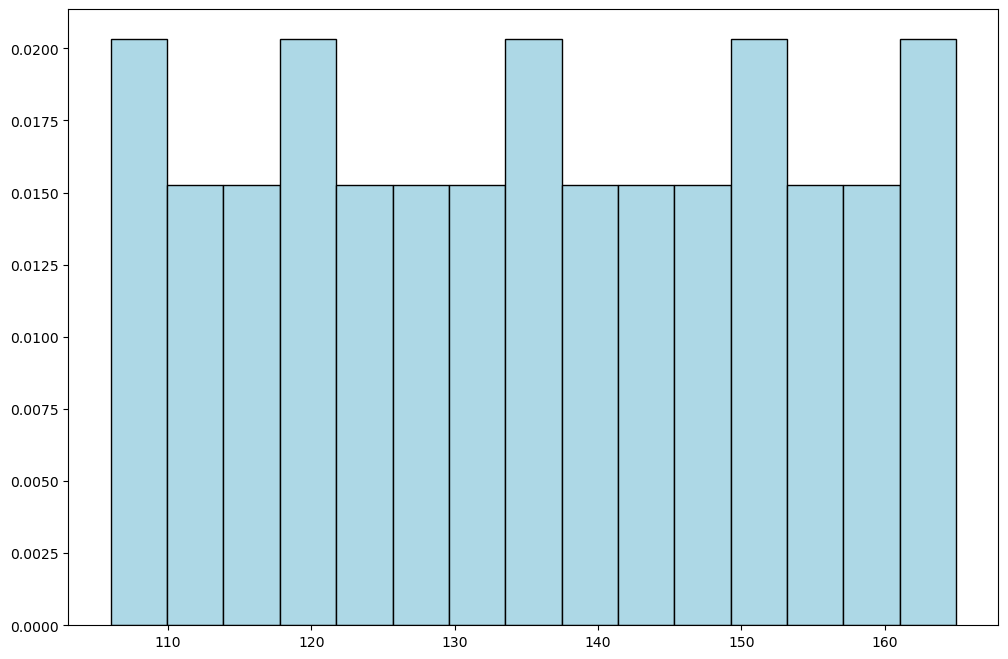

In [81]:
# Histogram with Normal Curve
from scipy import stats
x = np.linspace(min(poisson.rvs(mu=140, size=100)), max(poisson.rvs(mu=140, size=100))) # (Bobbit, 2021)     
plt.figure(figsize=(12, 8))
plt.hist(x, density=True, bins=15, color='lightblue', edgecolor='black')

p = stats.norm.pdf(x, mu, std)

plt.plot(x, p, 'r', linewidth=2, label='Normal Curve')
plt.show()



#### Binomial Distribution

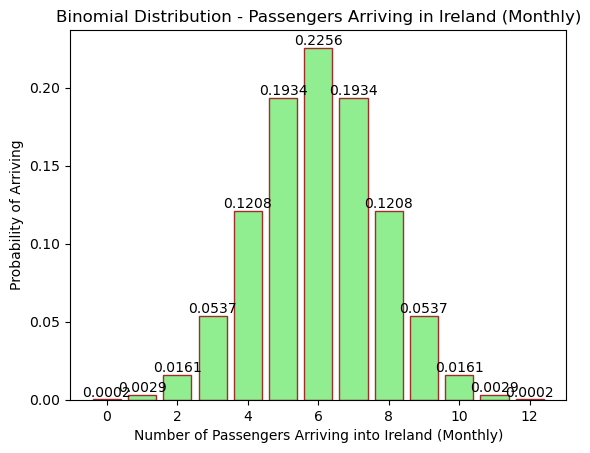

In [85]:
# What is the probability of a passenger arriving in Ireland in any given Month? 

from scipy.stats import binom
n = 12 # No. of Months
p = .5 # Probability of the passenger arriving
k = np.arange(0, n + 1) # Number of possible arrivals in a month
pmf = binom.pmf(k, n, p)
plt.bar(k, pmf, color='lightgreen', edgecolor='brown')
plt.xlabel('Number of Passengers Arriving into Ireland (Monthly)')
plt.ylabel('Probability of Arriving')
plt.title('Binomial Distribution - Passengers Arriving in Ireland (Monthly)')


# (Javapoint n.d.)

# Adding text to display probaility
for i in range(len(k)):
    plt.text(k[i], pmf[i], f'{pmf[i]:.4f}', ha='center', va='bottom')


plt.show()

In [86]:
probability = binom.pmf(k, n, p)

In [87]:
probability

array([0.00024414, 0.00292969, 0.01611328, 0.05371094, 0.12084961,
       0.19335938, 0.22558594, 0.19335938, 0.12084961, 0.05371094,
       0.01611328, 0.00292969, 0.00024414])

#### Normal Distribution

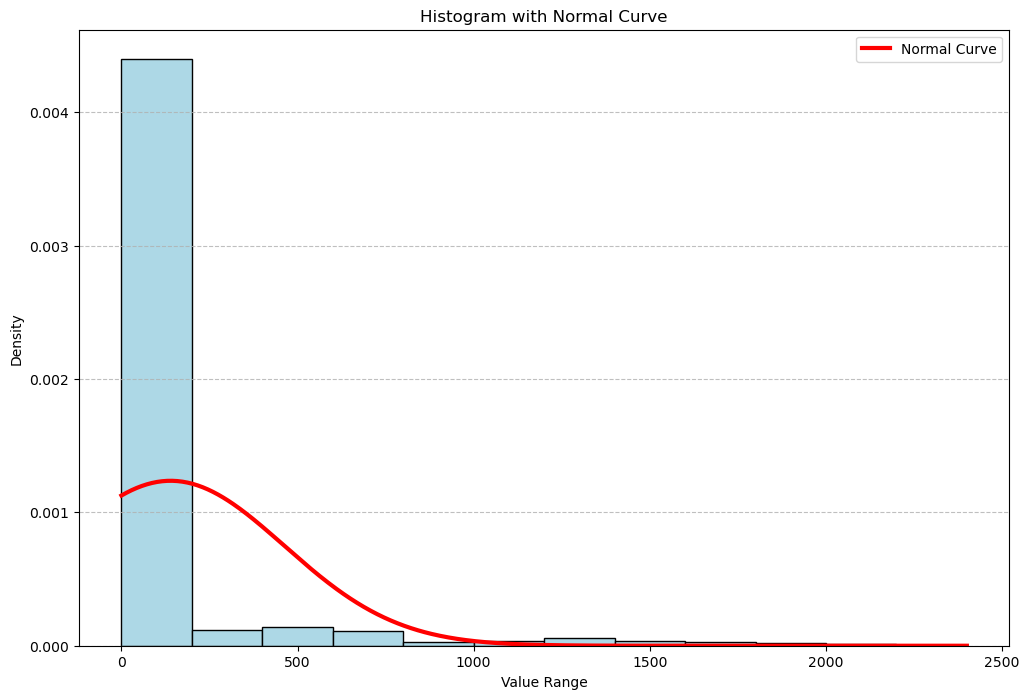

In [89]:
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(encode_df['VALUE'], bins=12, density=True, color='lightblue', edgecolor='black')

mu, std = stats.norm.fit(encode_df['VALUE'])

x = np.linspace(min(encode_df['VALUE']), max(df['VALUE']), 500)

p = stats.norm.pdf(x, mu, std)

plt.plot(x, p, 'r-', linewidth=3, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.legend()
plt.show()

In [90]:
x

array([   0.        ,    4.81042084,    9.62084168,   14.43126253,
         19.24168337,   24.05210421,   28.86252505,   33.67294589,
         38.48336673,   43.29378758,   48.10420842,   52.91462926,
         57.7250501 ,   62.53547094,   67.34589178,   72.15631263,
         76.96673347,   81.77715431,   86.58757515,   91.39799599,
         96.20841683,  101.01883768,  105.82925852,  110.63967936,
        115.4501002 ,  120.26052104,  125.07094188,  129.88136273,
        134.69178357,  139.50220441,  144.31262525,  149.12304609,
        153.93346693,  158.74388778,  163.55430862,  168.36472946,
        173.1751503 ,  177.98557114,  182.79599198,  187.60641283,
        192.41683367,  197.22725451,  202.03767535,  206.84809619,
        211.65851703,  216.46893788,  221.27935872,  226.08977956,
        230.9002004 ,  235.71062124,  240.52104208,  245.33146293,
        250.14188377,  254.95230461,  259.76272545,  264.57314629,
        269.38356713,  274.19398798,  279.00440882,  283.81482

In [91]:
# Test (Shapiro-Wilk)

stat, p_value = stats.shapiro(df['VALUE'])
print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: nan, p-value: nan


In [92]:
if p_value >= 0.05:
    print("It appears the sample is normally distributed.")
else:
    print("It appears the sample is not normally distributed.")

It appears the sample is not normally distributed.


###### Q-Q (Quantile-Quantile)

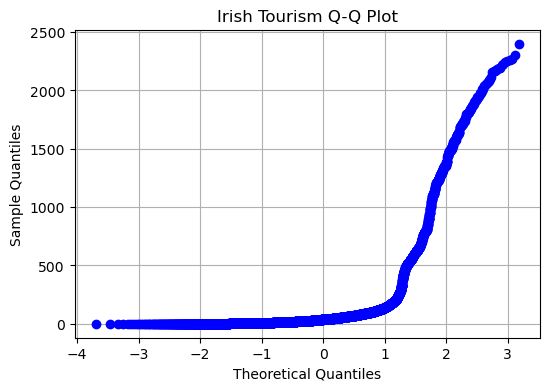

In [94]:
# Lets see ifthe dataset follows a specificied distribution

plt.figure(figsize=(6,4))
stats.probplot(df['VALUE'], dist="norm", plot=plt)

plt.title('Irish Tourism Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()
          

#### References

Bobbit, Z. (2021) How to use Poisson Distibution Python. Available at https://www.statology.org/poisson-distribution-python/  [Accessed November 2024]

Javapoint (n.d.). Binomial Distribution in python. Available at https://www.javatpoint.com/binomial-distribution-in-python [Accessed November 2024]

Nayak, L. (2022). Dealing with missing data using python. Available at https://medium.com/nerd-for-tech/dealing-with-missing-data-using-python-3fd785b77a05 [Accessed November 2024]

Suresh Kumar Mukhiya and Usman Ahmed (2020). Hands-On Exploratory Data Analysis with Python: Perform EDA Techniques to Understand, Summarize, and Investigate Your Data. Birmingham, UK: Packt Publishing. Available at https://research.ebsco.com/linkprocessor/plink?id=a7a86a4e-5138-33a3-8d22-3d92ff037bb3 [Accessed 26th, 27th & 28th October and November 2024]

Ranjan, S. (2024). Python | Pandas dataframe.replace(). Available at https://www.geeksforgeeks.org/python-pandas-dataframe-replace/ [Accessed November 2024]

Bhutani, K.  (2023). Python | Delete rows/columns from DataFrame using Pandas.drop(). Available at https://www.geeksforgeeks.org/python-delete-rows-columns-from-dataframe-using-pandas-drop/[Accessed November 2024]

Zafar, A. (2023) SVM Implementation in Python From Scratch- Step by Step Guide Available at https://www.mltut.com/svm-implementation-in-python-from-scratch/ [Accessed November 2024]

Simplilearn (2023) The Best Guide On How To Implement Decision Tree In Python.
Available at https://www.simplilearn.com/tutorials/machine-learning-tutorial/decision-tree-in-python [Accessed 4th November 2024]
